In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG, PATH_LOG

In [2]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "batch_size",
    "top_k",
    "seed",
    "epochs",
    "datasets",
    "log",
    "single_branch",
    "fusion_modalities",
    "fusion_type",
    "autoencoder",
    "ensemble_fusion",
    "info_nce"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'batch_size', 'top_k', 'seed', 'epochs', 'datasets', 'log', 'single_branch', 'fusion_modalities', 'fusion_type', 'autoencoder', 'ensemble_fusion', 'info_nce']


In [3]:
files = os.listdir(PATH_LOG)
settings = {}

for fname in files:
    with open(PATH_LOG / fname, "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, train_loss, val_loss, *res = lines[-1].strip().split("\t")

        s = lines[0].split("alpha:")
        lines[0] = s[0]

        d = json.loads(lines[0])

        if len(s) == 2:
            alpha = s[1]
            d["Alpha"] = alpha

        d["Epochs"] = int(epochs)
        d["T-Loss"] = float(train_loss)
        d["V-Loss"] = float(val_loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)

df

,multimodal,embedding_dim,n_layers,dataset,freeze,weighting,Epochs,T-Loss,V-Loss,Precision@5,...,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50,Alpha
8e14612cdf5217bacfddd41dfade3dd7,True,512,1,ml1m,True,normalized,500,0.1151,0.2957,0.2871,...,0.2396,0.1829,0.296,0.1908,0.278,0.3,0.1313,0.4453,0.345,<NA>
a6d81d30b6164825b47a534bb3c77769,True,512,2,dbbook,True,False,500,0.0398,0.3832,0.077,...,0.0606,0.0959,0.0942,0.0448,0.139,0.1111,0.0294,0.2253,0.142,<NA>
770abab677ef579fb8ad0ae401886181,True,512,0,dbbook,True,alpha,500,0.0087,0.3777,0.0717,...,0.0555,0.0888,0.0881,0.0412,0.1287,0.1037,0.0267,0.2049,0.1312,0.8825749754905701
ee432bf0e3726c7bbe031d19266ebb08,True,512,0,ml1m,False,False,500,0.0391,0.4545,0.1882,...,0.1634,0.1305,0.1997,0.1356,0.2096,0.2111,0.1,0.3577,0.2565,<NA>
27cd55d8839b8e96f23fdb23b5d8365a,True,512,2,ml1m,True,normalized,500,0.1506,0.2898,0.2907,...,0.2446,0.1835,0.3003,0.1938,0.2774,0.3026,0.1328,0.4443,0.3461,<NA>
bef7ff459312e3d3a5aea28eb59c0038,True,512,2,ml1m,True,equal,500,0.0799,0.3254,0.2634,...,0.222,0.1755,0.2736,0.1801,0.268,0.2822,0.1262,0.4362,0.3306,<NA>
2b66f005b95cd5d6a0cd5334e3533f26,False,512,3,ml1m,True,False,500,0.0754,0.3404,0.2592,...,0.2205,0.176,0.2725,0.18,0.2702,0.2821,0.1252,0.4348,0.3288,<NA>
fe729c3493b9de1f81866e9f9e358abf,True,512,3,ml1m,False,False,500,0.0438,0.3863,0.234,...,0.1985,0.1597,0.2458,0.162,0.2485,0.2559,0.1146,0.4057,0.302,<NA>
7df1348c405956949ae3eab798df19af,True,512,1,ml1m,False,False,500,0.0397,0.4219,0.2127,...,0.1815,0.1472,0.2247,0.1489,0.2301,0.235,0.1074,0.3839,0.281,<NA>
3cc3e7d494a5ceea476def00697dd1ab,True,512,1,dbbook,True,False,500,0.0212,0.3732,0.077,...,0.0593,0.0949,0.0939,0.0438,0.1367,0.1103,0.0287,0.2204,0.1404,<NA>


In [4]:
new_df = df.drop(["Alpha"], axis=1).where(
    (df["dataset"] == "dbbook")
    & (df["multimodal"] == True)
    & (df["freeze"] == True)
    & (df["weighting"] == False)
).dropna().sort_values(by="n_layers")

new_df

,multimodal,embedding_dim,n_layers,dataset,freeze,weighting,Epochs,T-Loss,V-Loss,Precision@5,...,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
b0c84a219471e668ff034095600a2d53,True,512,0,dbbook,True,False,500,0.0077,0.3731,0.0742,...,0.0896,0.0565,0.0905,0.09,0.0418,0.1306,0.1058,0.0273,0.2096,0.1342
3cc3e7d494a5ceea476def00697dd1ab,True,512,1,dbbook,True,False,500,0.0212,0.3732,0.077,...,0.0926,0.0593,0.0949,0.0939,0.0438,0.1367,0.1103,0.0287,0.2204,0.1404
a6d81d30b6164825b47a534bb3c77769,True,512,2,dbbook,True,False,500,0.0398,0.3832,0.077,...,0.0922,0.0606,0.0959,0.0942,0.0448,0.139,0.1111,0.0294,0.2253,0.142
459584804da01f2e1639b25b79b9e8e7,True,512,3,dbbook,True,False,500,0.0623,0.3981,0.0756,...,0.0899,0.0601,0.095,0.0927,0.0446,0.1388,0.1098,0.0298,0.2282,0.1419


In [5]:
dict_df = new_df.to_dict(orient="index")

l = []

for id, d in dict_df.items():
    values = [
        d["Precision@5"],
        d["Recall@5"],
        d["NDCG@5"],
        d["Precision@10"],
        d["Recall@10"],
        d["NDCG@10"],
        d["Precision@20"],
        d["Recall@20"],
        d["NDCG@20"],
        d["Precision@50"],
        d["Recall@50"],
        d["NDCG@50"]
    ]

    l.append(values)

for v in l:
    print(" ".join(["{:.4f}".format(x) for x in v]))

0.0742 0.0604 0.0896 0.0565 0.0905 0.0900 0.0418 0.1306 0.1058 0.0273 0.2096 0.1342
0.0770 0.0618 0.0926 0.0593 0.0949 0.0939 0.0438 0.1367 0.1103 0.0287 0.2204 0.1404
0.0770 0.0619 0.0922 0.0606 0.0959 0.0942 0.0448 0.1390 0.1111 0.0294 0.2253 0.1420
0.0756 0.0606 0.0899 0.0601 0.0950 0.0927 0.0446 0.1388 0.1098 0.0298 0.2282 0.1419


In [6]:
file = list(sorted(os.listdir(PATH_LOG)))[-3]
file = "c1fb41386ceaafe55aa84124a5412ef8.log"
file_path = PATH_LOG / file

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config_line = config_line.split("alpha:")[0]
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [7]:
epochs = data["Epoch"]
train_loss = data["T-Loss"]
val_loss = data["V-Loss"]

In [8]:
for k in drop_columns:
    if k in config:
        config.pop(k)
json_config = pd.DataFrame(config.values(), index=config.keys())
json_config

,0
multimodal,True
embedding_dim,512
n_layers,0
dataset,ml1m
freeze,True
weighting,normalized


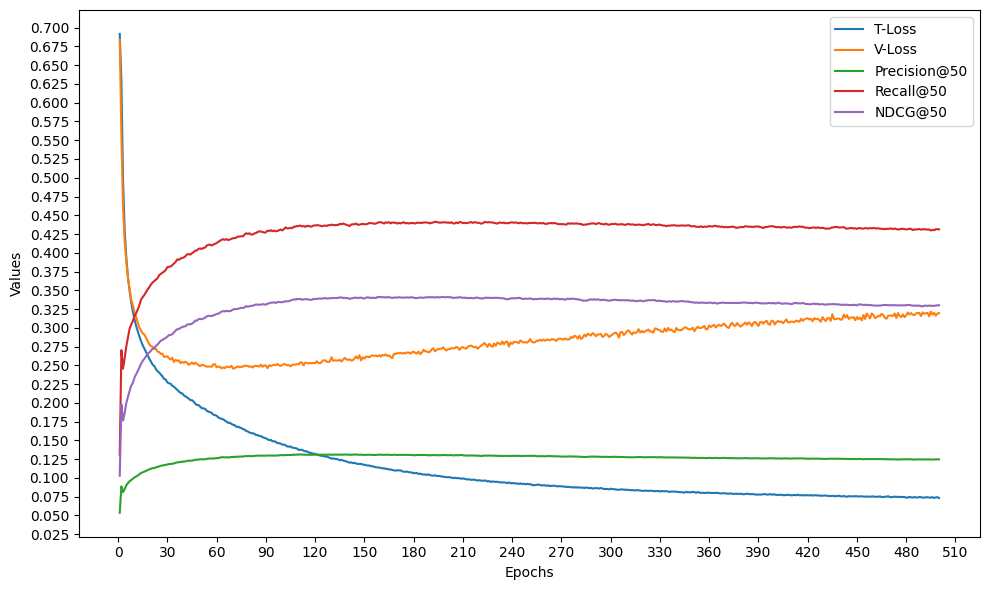

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, label="T-Loss")
plt.plot(epochs, val_loss, label="V-Loss")

for k in [50]:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
#plt.title(file_path)
plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
#plt.yscale("log")

plt.tight_layout()
plt.show()